In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.transforms as mtransforms
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage import gaussian_filter1d
from matplotlib.lines import Line2D
import scipy
import scipy.stats as st 
from matplotlib import patches
import matplotlib.colors as mcolors

In [2]:
data_df = pd.read_csv("../results/simulation_results.csv", index_col=0)
data_df["method"] = pd.Categorical(data_df['method'], ["aldex", "ancombc2", "linda",
                                                       "lmerseq", "NBZIMM", "maaslin2", "aldex_lin"])
data_df = data_df[data_df["method"]!="aldex_lin"]

<>:68: SyntaxWarning: invalid escape sequence '\#'
<>:86: SyntaxWarning: invalid escape sequence '\#'
<>:68: SyntaxWarning: invalid escape sequence '\#'
<>:86: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_76532/1610925043.py:68: SyntaxWarning: invalid escape sequence '\#'
  axs[ax_l].set_xlabel("\# Study Participants", fontsize=11)
/tmp/ipykernel_76532/1610925043.py:86: SyntaxWarning: invalid escape sequence '\#'
  axs[ax_r].set_xlabel("\# Study Participants", fontsize=11)
/tmp/ipykernel_76532/1610925043.py:63: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="FDR_mean", hue="method",
/tmp/ipykernel_76532/1610925043.py:63: UserWarning: The dashes list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="FDR_mean", hue="method",
/tmp/ipykernel_76532/1610925043.py:82: UserWarning: The palette list ha

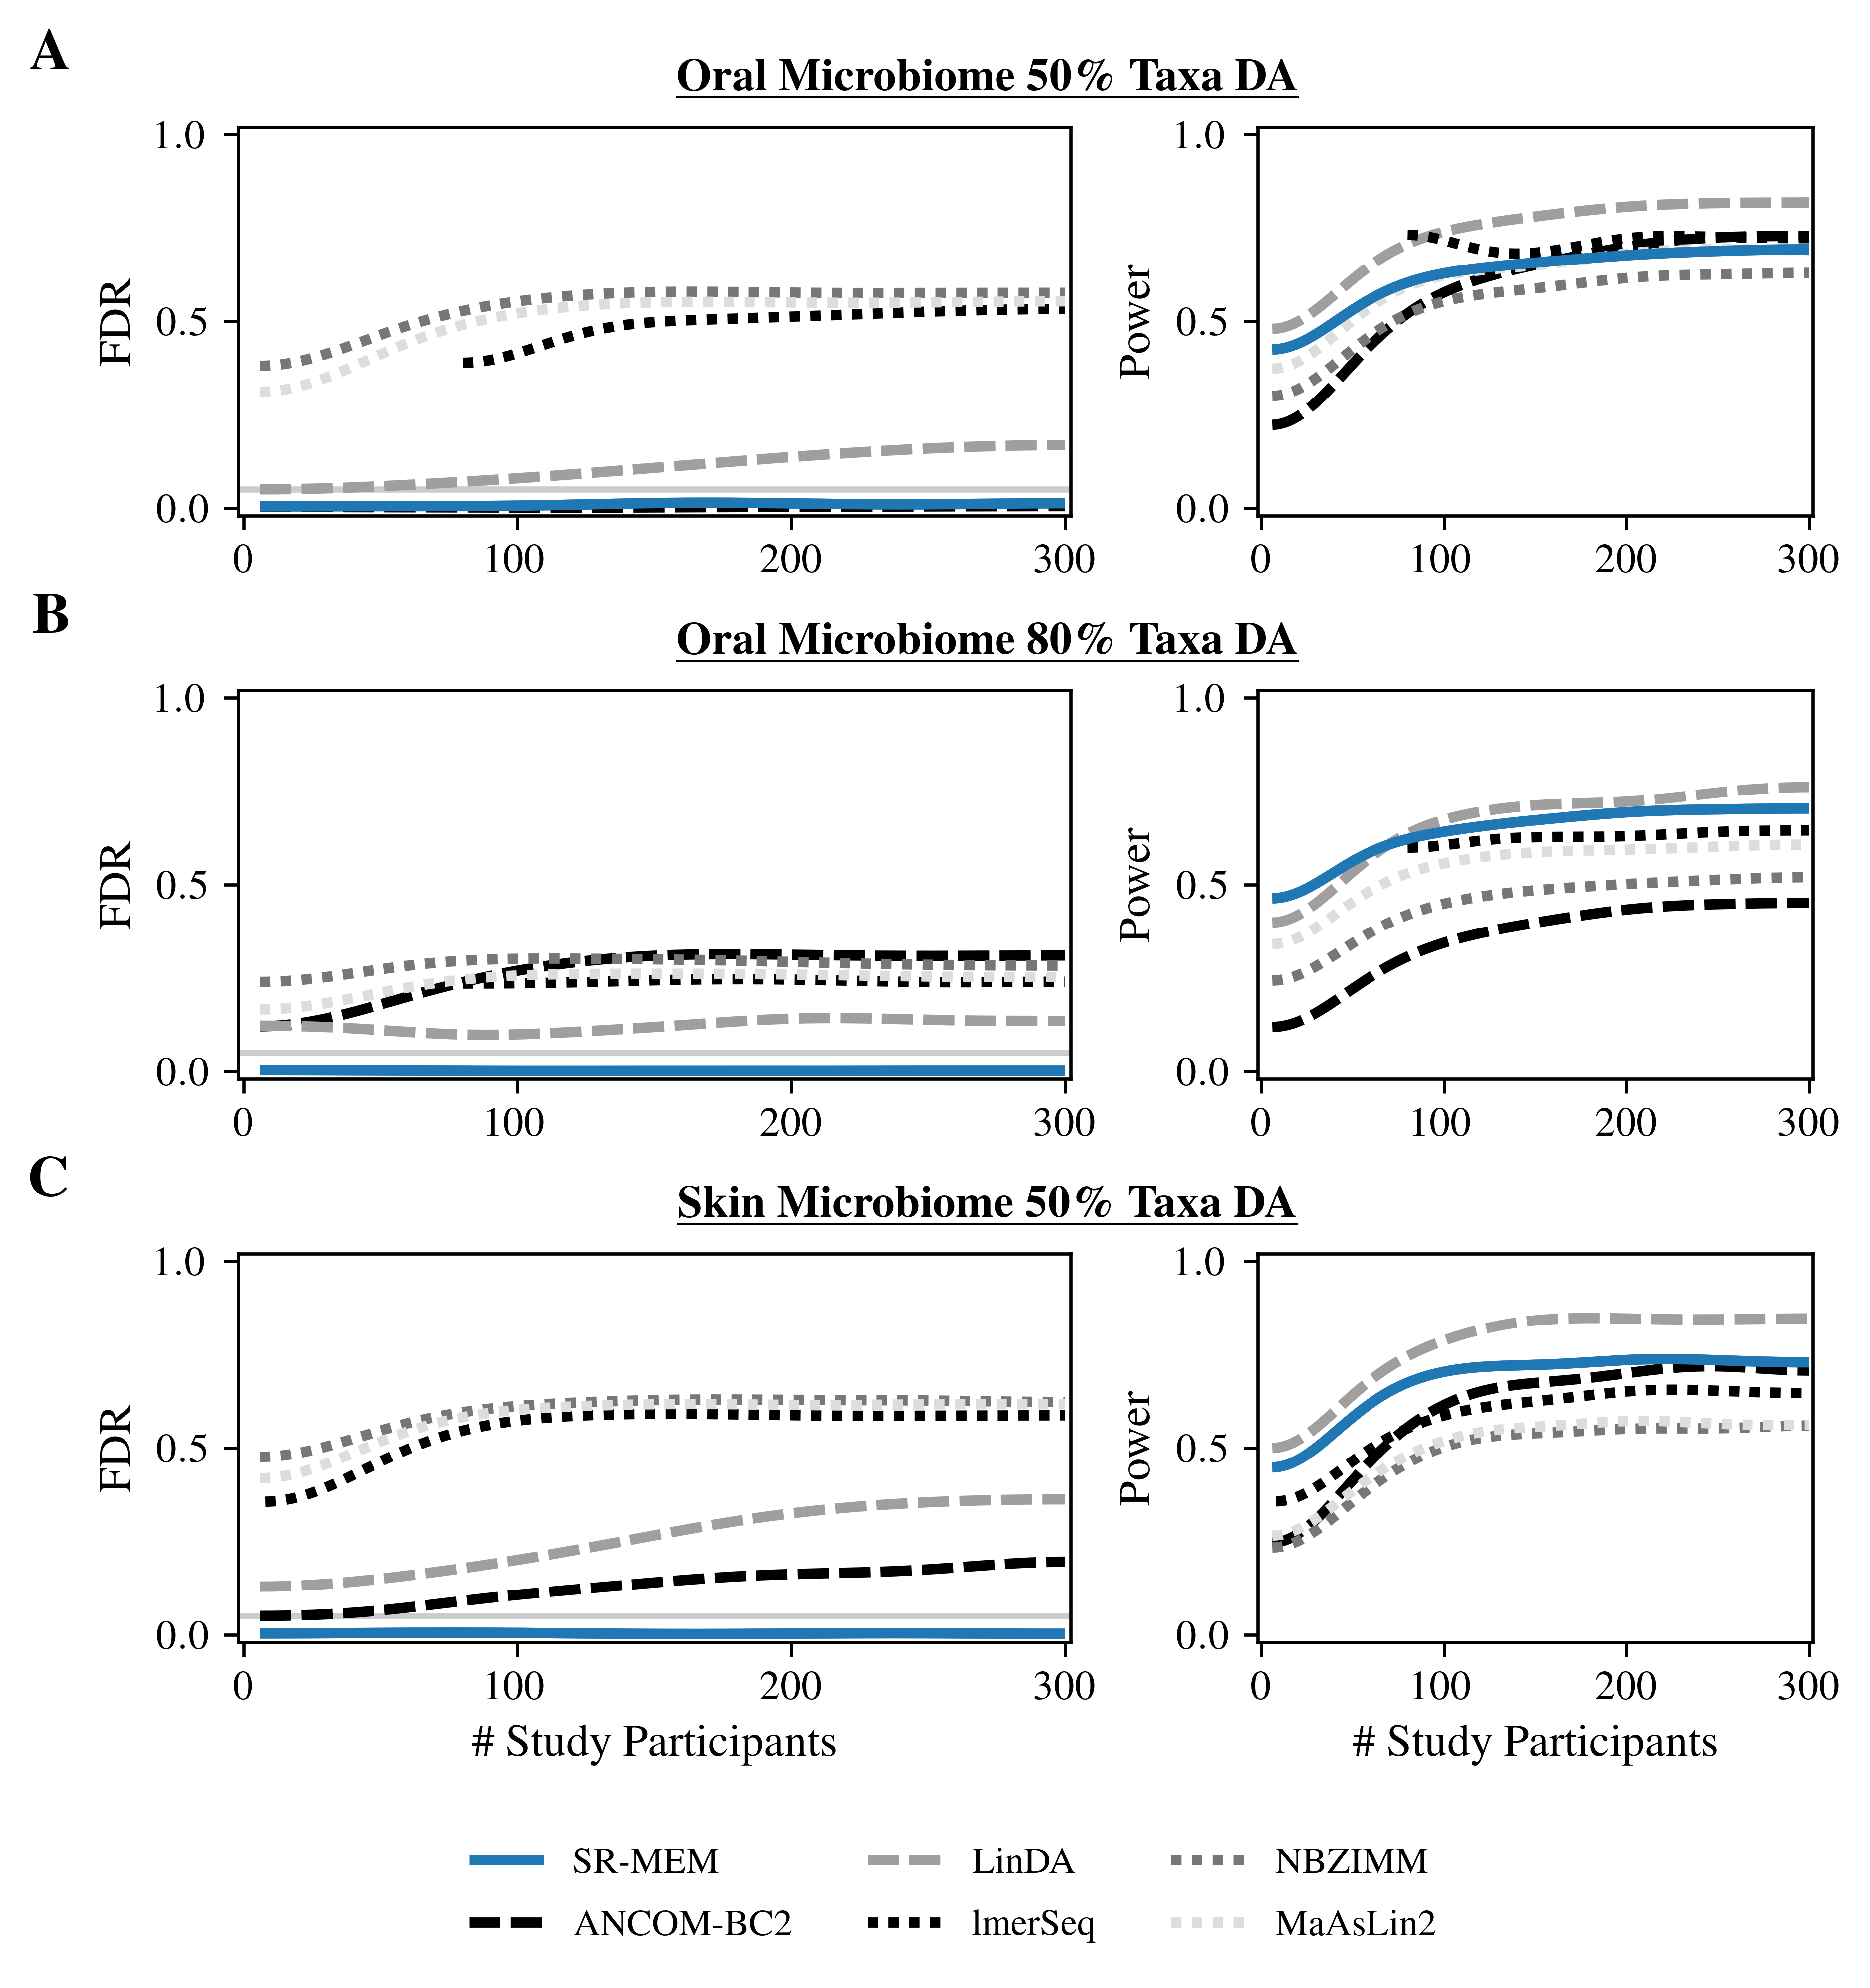

In [3]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

gs_kw = dict(width_ratios=[1.5,1],
             height_ratios=[1,1,1])

width = 6.8
height = 6.5
dpi = 600
pw = width*dpi
ph = height*dpi
palette = ['#1f77b4', '#000000', '#9F9F9F', '#000000', '#777777',  '#DDDDDD']
dashes = [(1,0), (3,1), (3,1), (1,1), (1,1), (1,1)]

fig, axs = plt.subplot_mosaic([["A", "B"],
                               ["C", "D"],
                               ["E", "F"]], figsize=(pw/dpi, ph/dpi),
                              dpi=dpi, gridspec_kw=gs_kw)

def smooth_it(df_s, col, sigma=30):
    pdf = pd.DataFrame()
    for method in df_s["method"].unique():
        sdf = df_s[df_s["method"]==method]
        n_s = np.linspace(sdf["n_s"].min(), sdf["n_s"].max(), 300) 
        spl = make_interp_spline(sdf["n_s"], sdf[col], k=1)
        smoothed = gaussian_filter1d(spl(n_s), sigma=sigma)
        if col == "FDR_mean":
            name = "FDR_mean"
        else:
            name = "Power_mean"
        if pdf.empty:
            pdf = pd.DataFrame({"n_s": n_s, name: smoothed, "method": method})
        else:
            tdf = pd.DataFrame({"n_s": n_s, name: smoothed, "method": method})
            pdf = pd.concat([pdf, tdf])
    return(pdf)

ylim_l = -0.02
ylim_u = 1.02

counter = 0
axis_list = ["A", "B", "C", "D", "E", "F"]
sets = [["oral", 0.1, 0.4],
        ["oral", 0.1, 0.7],
        ["armpit", 0.0, 0.5]]
titles = ["Oral Microbiome 50\\% Taxa DA",
          "Oral Microbiome 80\\% Taxa DA",
          "Skin Microbiome 50\\% Taxa DA"]
for index, curr_set in enumerate(sets):
    g_df = data_df.loc[
        (data_df["system"]==curr_set[0])&(data_df["pc_l"]==curr_set[1])&(data_df["pc_u"]==curr_set[2])]
    g_df = g_df.sort_values(by=["method", "n_s"])
    
    ax_l = axis_list[counter]
    ax_r = axis_list[counter+1]

    pdf = smooth_it(g_df, "FDR_mean")
    axs[ax_l].set_xlim(-2, 302)
    axs[ax_l].set_ylim(ylim_l, ylim_u)
    sns.lineplot(data=pdf, x="n_s", y="FDR_mean", hue="method", style="method", palette=palette,
                 ax=axs[ax_l], linewidth=2.5, dashes=dashes)
    if curr_set!=["oral", 0.1, 0.41]:
        sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="FDR_mean", hue="method",
                     style="method", palette=palette, ax=axs[ax_l], linewidth=2.5, dashes=dashes)
    axs[ax_l].axhline(y=0.05, linestyle="solid", linewidth=1.5, color="gray", zorder=-5, alpha=0.4)
    axs[ax_l].get_legend().remove()
    if index==2:
        axs[ax_l].set_xlabel("\# Study Participants", fontsize=11)
    else:
        axs[ax_l].set_xlabel(None)
    axs[ax_l].set_ylabel("FDR", fontsize=11)
    axs[ax_l].text(0.9, 1.07, r"\underline{{\textbf{{{}}}}}".format(titles[index]), 
                   fontsize=11, ha='center', va='bottom', transform=axs[ax_l].transAxes)
    #axs[ax_l].text(0.9, 1.07, r"\underline{\textbf{}}".format(titles[index]), 
    #               fontsize=11, ha='center', va='bottom', transform=axs[ax_l].transAxes)
    
    pdf = smooth_it(g_df, "Power_mean")
    axs[ax_r].set_xlim(-2, 302)
    axs[ax_r].set_ylim(ylim_l, ylim_u)
    sns.lineplot(data=pdf, x="n_s", y="Power_mean", hue="method", style="method", palette=palette,
                 ax=axs[ax_r], linewidth=2.5, dashes=dashes)
    sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="Power_mean", hue="method",
                 style="method", palette=palette, ax=axs[ax_r], linewidth=2.5, dashes=dashes)
    axs[ax_r].get_legend().remove()
    if index==2:
        axs[ax_r].set_xlabel("\# Study Participants", fontsize=11)
    else:
        axs[ax_r].set_xlabel(None)
    axs[ax_r].set_ylabel("Power", fontsize=11)
    
    counter += 2

axs["A"].text(-0.2, 1.25, r"\textbf{A}", transform=axs["A"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["C"].text(-0.2, 1.25, r"\textbf{B}", transform=axs["C"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["E"].text(-0.2, 1.25, r"\textbf{C}", transform=axs["E"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')

fig.subplots_adjust(bottom=0.1, wspace=0.27, hspace=0.45)
handles, labels = axs["F"].get_legend_handles_labels()
label_dict = {"aldex": "SR-MEM", "ancombc2": "ANCOM-BC2",
              "linda": "LinDA", "lmerseq": "lmerSeq", "maaslin2": "MaAsLin2",
              "NBZIMM": "NBZIMM"}
labels = [label_dict[l] for l in labels]
leg = axs["F"].legend(handles=handles[0:6], labels=labels[0:6], ncol=3, loc='upper center', 
                      bbox_to_anchor=(-0.55, -0.44), fancybox=False, shadow=False,
                      fontsize=9, frameon=False, labelspacing=0.75)
fig.savefig('../../../figures/Figure_1.png', bbox_inches='tight')

In [4]:
data_df = pd.read_csv("../results/simulation_results.2.csv", index_col=0)
data_df["method"] = pd.Categorical(data_df['method'], ["aldex", "ancombc2", "linda",
                                                       "lmerseq", "NBZIMM", "maaslin2", "aldex_lin"])
data_df = data_df[data_df["method"].isin(["aldex", "aldex_lin"])]

<>:69: SyntaxWarning: invalid escape sequence '\#'
<>:87: SyntaxWarning: invalid escape sequence '\#'
<>:69: SyntaxWarning: invalid escape sequence '\#'
<>:87: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_76532/2040982460.py:69: SyntaxWarning: invalid escape sequence '\#'
  axs[ax_l].set_xlabel("\# Study Participants", fontsize=11)
/tmp/ipykernel_76532/2040982460.py:87: SyntaxWarning: invalid escape sequence '\#'
  axs[ax_r].set_xlabel("\# Study Participants", fontsize=11)
/tmp/ipykernel_76532/2040982460.py:63: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="FDR_mean", hue="method",
/tmp/ipykernel_76532/2040982460.py:63: UserWarning: The dashes list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="FDR_mean", hue="method",
/tmp/ipykernel_76532/2040982460.py:83: UserWarning: The palette list ha

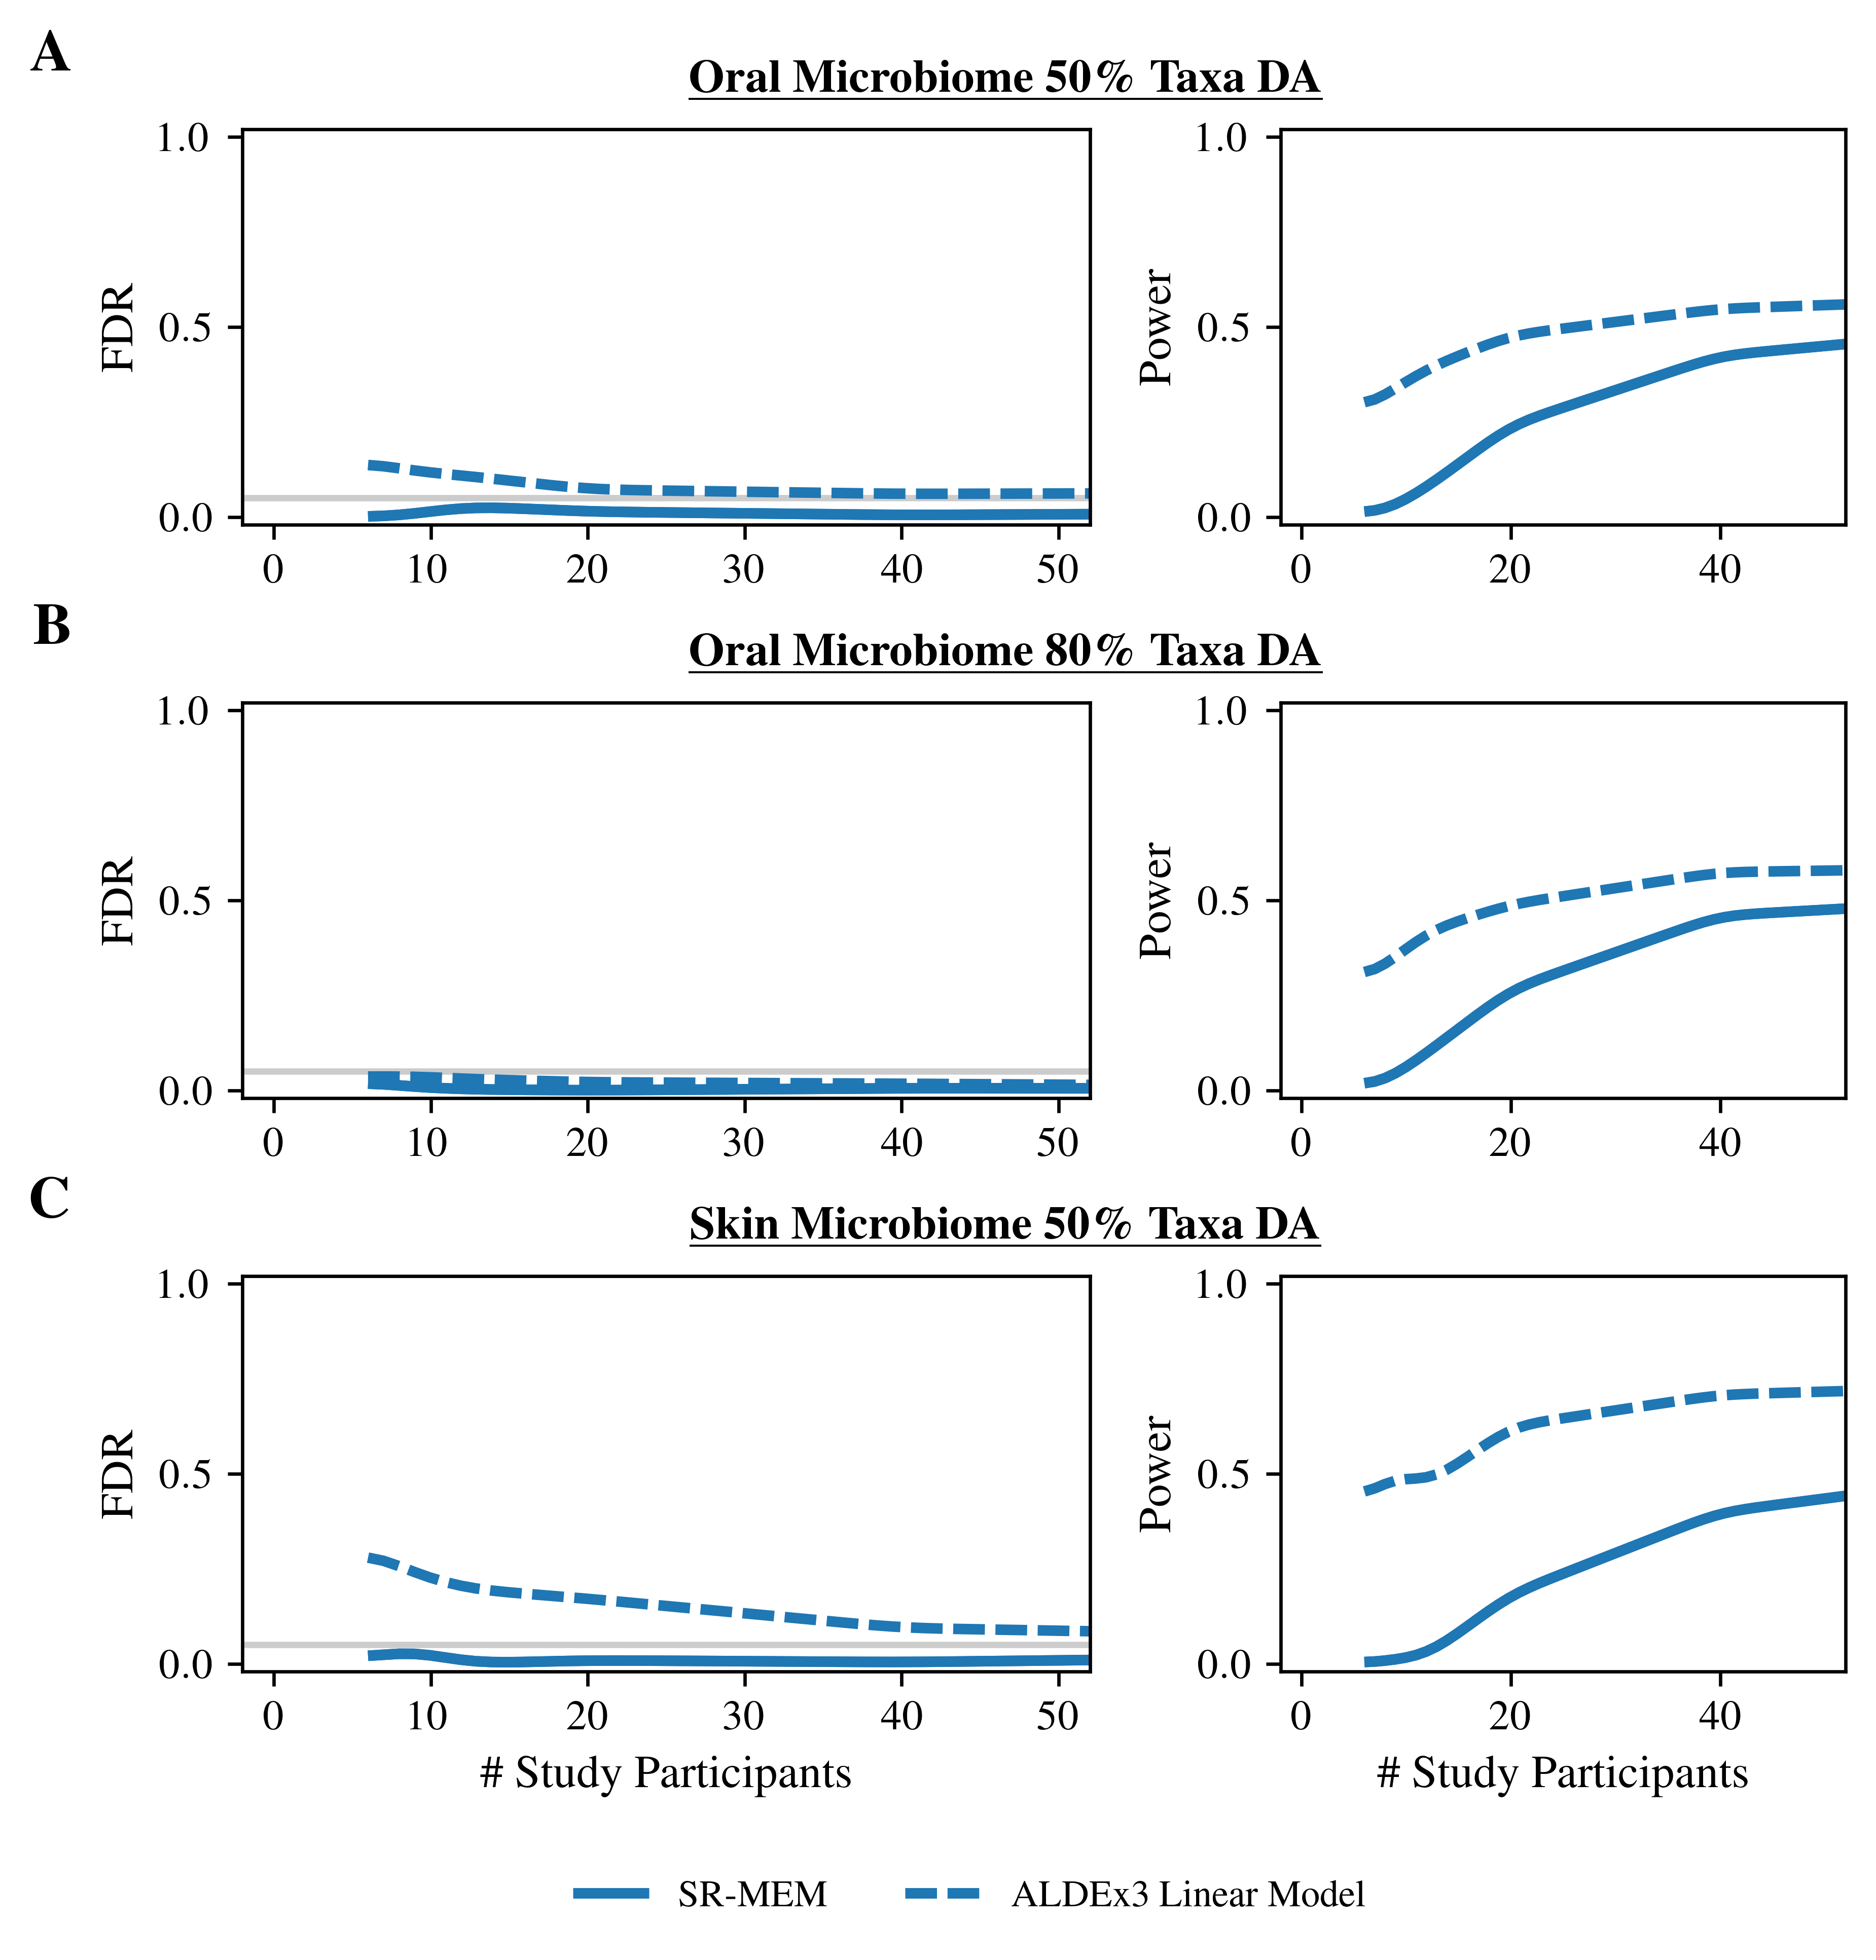

In [5]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

gs_kw = dict(width_ratios=[1.5,1],
             height_ratios=[1,1,1])

width = 6.8
height = 6.5
dpi = 600
pw = width*dpi
ph = height*dpi
palette = ['#1f77b4', '#1f77b4']
dashes = [(1,0), (3,1)]

fig, axs = plt.subplot_mosaic([["A", "B"],
                               ["C", "D"],
                               ["E", "F"]], figsize=(pw/dpi, ph/dpi),
                              dpi=dpi, gridspec_kw=gs_kw)

def smooth_it(df_s, col, sigma=2):
    pdf = pd.DataFrame()
    for method in df_s["method"].unique():
        sdf = df_s[df_s["method"]==method]
        n_s = np.linspace(sdf["n_s"].min(), sdf["n_s"].max(), 300) 
        spl = make_interp_spline(sdf["n_s"], sdf[col], k=1)
        smoothed = gaussian_filter1d(spl(n_s), sigma=sigma)
        if col == "FDR_mean":
            name = "FDR_mean"
        else:
            name = "Power_mean"
        if pdf.empty:
            pdf = pd.DataFrame({"n_s": n_s, name: smoothed, "method": method})
        else:
            tdf = pd.DataFrame({"n_s": n_s, name: smoothed, "method": method})
            pdf = pd.concat([pdf, tdf])
    return(pdf)

ylim_l = -0.02
ylim_u = 1.02

counter = 0
axis_list = ["A", "B", "C", "D", "E", "F"]
sets = [["oral", 0.1, 0.4],
        ["oral", 0.1, 0.7],
        ["armpit", 0.0, 0.5]]
titles = ["Oral Microbiome 50\\% Taxa DA",
          "Oral Microbiome 80\\% Taxa DA",
          "Skin Microbiome 50\\% Taxa DA"]
for index, curr_set in enumerate(sets):
    g_df = data_df.loc[
        (data_df["system"]==curr_set[0])&(data_df["pc_l"]==curr_set[1])&(data_df["pc_u"]==curr_set[2])]
    g_df = g_df.sort_values(by=["method", "n_s"])
    
    ax_l = axis_list[counter]
    ax_r = axis_list[counter+1]

    pdf = smooth_it(g_df, "FDR_mean")
    axs[ax_l].set_xlim(-2, 52)
    axs[ax_l].set_ylim(ylim_l, ylim_u)
    sns.lineplot(data=pdf, x="n_s", y="FDR_mean", hue="method", style="method", palette=palette,
                 ax=axs[ax_l], linewidth=2.5, dashes=dashes)
    if curr_set!=["oral", 0.1, 0.41]:
        sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="FDR_mean", hue="method",
                     style="method", palette=palette, ax=axs[ax_l], linewidth=2.5, dashes=dashes,
                    legend=False)
    axs[ax_l].axhline(y=0.05, linestyle="solid", linewidth=1.5, color="gray", zorder=-5, alpha=0.4)
    axs[ax_l].get_legend().remove()
    if index==2:
        axs[ax_l].set_xlabel("\# Study Participants", fontsize=11)
    else:
        axs[ax_l].set_xlabel(None)
    axs[ax_l].set_ylabel("FDR", fontsize=11)
    axs[ax_l].text(0.9, 1.07, r"\underline{{\textbf{{{}}}}}".format(titles[index]), 
                   fontsize=11, ha='center', va='bottom', transform=axs[ax_l].transAxes)
    #axs[ax_l].text(0.9, 1.07, r"\underline{\textbf{}}".format(titles[index]), 
    #               fontsize=11, ha='center', va='bottom', transform=axs[ax_l].transAxes)
    
    pdf = smooth_it(g_df, "Power_mean")
    axs[ax_r].set_xlim(-2, 52)
    axs[ax_r].set_ylim(ylim_l, ylim_u)
    sns.lineplot(data=pdf, x="n_s", y="Power_mean", hue="method", style="method", palette=palette,
                 ax=axs[ax_r], linewidth=2.5, dashes=dashes)
    sns.lineplot(data=pdf[pdf["method"]=="aldex"], x="n_s", y="Power_mean", hue="method",
                 style="method", palette=palette, ax=axs[ax_r], linewidth=2.5, dashes=dashes, legend=False)
    axs[ax_r].get_legend().remove()
    if index==2:
        axs[ax_r].set_xlabel("\# Study Participants", fontsize=11)
    else:
        axs[ax_r].set_xlabel(None)
    axs[ax_r].set_ylabel("Power", fontsize=11)
    
    counter += 2

axs["A"].text(-0.2, 1.25, r"\textbf{A}", transform=axs["A"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["C"].text(-0.2, 1.25, r"\textbf{B}", transform=axs["C"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["E"].text(-0.2, 1.25, r"\textbf{C}", transform=axs["E"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')

fig.subplots_adjust(bottom=0.1, wspace=0.27, hspace=0.45)
handles, labels = axs["F"].get_legend_handles_labels()
label_dict = {"aldex": "SR-MEM", "aldex_lin": "ALDEx3 Linear Model"}
labels = [label_dict[l] for l in labels]
leg = axs["F"].legend(handles=handles[0:6], labels=labels[0:6], ncol=3, loc='upper center', 
                      bbox_to_anchor=(-0.55, -0.44), fancybox=False, shadow=False,
                      fontsize=9, frameon=False, labelspacing=0.75)
fig.savefig('../../../supplement/SFigure_1.png', bbox_inches='tight')